# 4.

In [2]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp
%matplotlib inline

In [3]:
a, sigma = 0, 1
N = 10**4
nToShow = np.array([10, 25, 50, 100, 1000, N])

values = np.random.normal(a, sigma, N)

def p(x):
    return np.exp(-((x - a)**2) / 2) / np.sqrt(2 * np.pi * sigma ** 2)

def F(x):
    return (1 + sp.erf((x - a) / np.sqrt(2 * sigma ** 2))) / 2

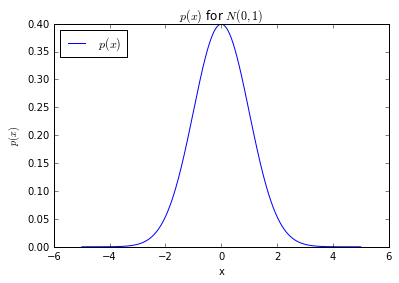

In [4]:
px = np.linspace(a - 5, a + 5, N)

myFigure, myAxis = plt.subplots()
myAxis.plot(px, [p(x) for x in px], label=r"$p(x)$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("x")
myAxis.set_ylabel(r"$p(x)$")
myAxis.set_title(r"$p(x)$ for $N({}, {})$".format(a, sigma))

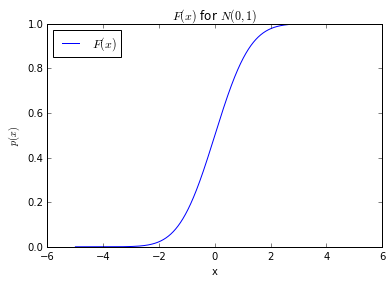

In [5]:
Fx = np.linspace(a - 5, a + 5, N)

myFigure, myAxis = plt.subplots()
myAxis.plot(Fx, [F(x) for x in Fx], label=r"$F(x)$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("x")
myAxis.set_ylabel(r"$p(x)$")
myAxis.set_title(r"$F(x)$ for $N({}, {})$".format(a, sigma))

In [6]:
# Считаем эмпирические функции распределения
sortedValues = [value for value in values]
xs, Fs = [], []
for n in range(N):
    sortedValues[:n] = np.sort(sortedValues[:n]) # Сортируем нужный кусок значений
    xs.append(np.linspace(sortedValues[0], sortedValues[n - 1], n)) # Создаем иксы    
    Fs.append([])

    index = 0
    for curentX in xs[n]:
        while (sortedValues[index] < curentX):
            index = index + 1
        Fs[n].append(index / n)

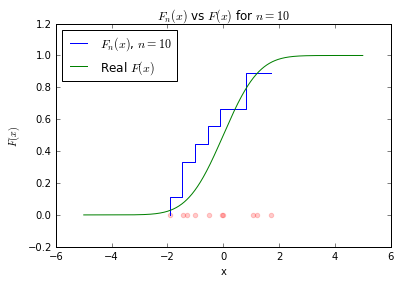

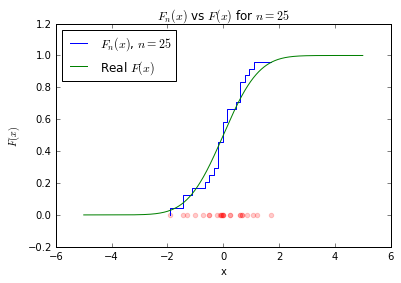

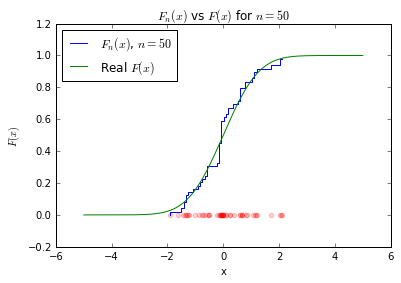

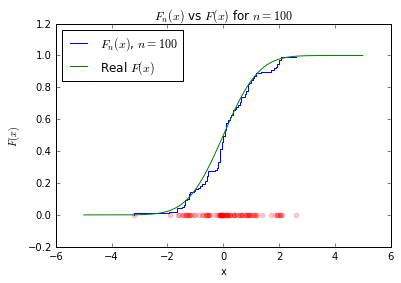

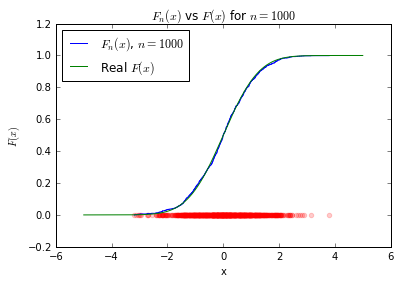

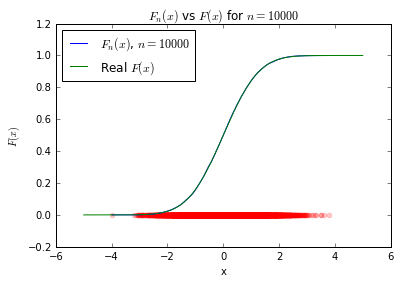

In [7]:
# Строим графики
for n in nToShow:
    Fx = np.linspace(a - 5, a + 5, N)
    Fy = [F(x) for x in Fx]

    myFigure, myAxis = plt.subplots()
    myAxis.step(xs[n - 1], Fs[n - 1], label="$F_n(x)$, $n = {}$".format(n))
    myAxis.plot(Fx, Fy, label="Real $F(x)$".format(n))
    myAxis.scatter(values[:n], np.zeros(n), color = "red", alpha=0.2)
    myAxis.legend(loc="upper left")
    myAxis.set_xlabel("x")
    myAxis.set_ylabel(r"$F(x)$")
    myAxis.set_title("$F_n(x)$ vs $F(x)$ for $n = {}$".format(n))

In [8]:
Dn = []
for n in range(1, N):
    supremum = abs(F(xs[n][0]) - Fs[n][0])    
    for i in range(n):
        supremum = max(supremum, abs(F(xs[n][i]) - Fs[n][i]))
    Dn.append(supremum)

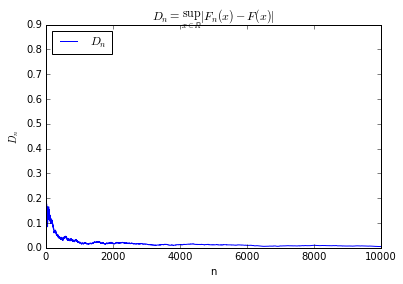

In [9]:
myFigure, myAxis = plt.subplots()

myAxis.plot(Dn, label=r"$D_n$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D_n$")
myAxis.set_title("$D_n = \sup_{x\in \mathbb{R}}|F_n(x)-F(x)|$")